In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv(r"C:\Users\GIRINATH\Downloads\Spam Email Detection - spam.csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
x= df['v2']
y = df['v1']


In [5]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [6]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [7]:
# Convert text data into a numerical form using CountVectorizer

In [8]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)


In [9]:
x

<5572x8625 sparse matrix of type '<class 'numpy.int64'>'
	with 73734 stored elements in Compressed Sparse Row format>

In [10]:
y=y.map({"spam":0,"ham":1})

In [11]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: int64

In [12]:

# Split the dataset into training and testing sets

In [13]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [14]:
print(x_train.shape)

(3900, 8625)


In [15]:
print(x_test.shape)

(1672, 8625)


In [16]:
print(y_train.shape)

(3900,)


In [17]:
print(y_test.shape)

(1672,)


In [18]:
# Train the Naive Bayes model

In [19]:
mnb = MultinomialNB()
model=mnb.fit(x_train, y_train)

In [20]:
model

MultinomialNB()

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [23]:

# Evaluate the model

In [24]:
accuracy = accuracy_score(y_test, y_pred)

In [25]:
accuracy

0.9784688995215312

In [26]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.85%


In [27]:
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[ 201,   18],
       [  18, 1435]], dtype=int64)

In [29]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 201   18]
 [  18 1435]]


In [30]:
report = classification_report(y_test, y_pred)


In [31]:
report

'              precision    recall  f1-score   support\n\n           0       0.92      0.92      0.92       219\n           1       0.99      0.99      0.99      1453\n\n    accuracy                           0.98      1672\n   macro avg       0.95      0.95      0.95      1672\nweighted avg       0.98      0.98      0.98      1672\n'

In [32]:
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       219
           1       0.99      0.99      0.99      1453

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [33]:
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt

<Axes: >

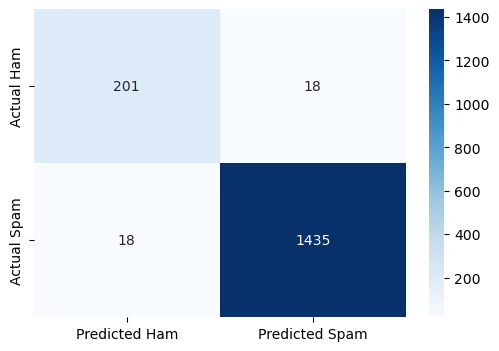

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Predicted Ham', 'Predicted Spam'], 
            yticklabels=['Actual Ham', 'Actual Spam'])

In [56]:
#USER INPUT TO CHECK THE MODEL

In [81]:
def check_spam(email_text):
    user_input_transformed = vectorizer.transform([email_text])
    prediction = model.predict(user_input_transformed)
    if prediction[0] == 1:
        print("The email is HAM.")
    else:
        print("The email is SPAM")


In [82]:
email_text = "Congratulations! You have won a free gift card."


In [83]:
check_spam(email_text)

The email is SPAM


In [84]:
email_text="Can we reschedule our meeting to 3 PM tomorrow?"



In [85]:
check_spam(email_text)

The email is HAM.
